In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-02 12:43:44.212512: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-02 12:43:44.245000: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-02 12:43:44.723070: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/RJ_Reconstrucao_Crustaceos_2024_06_25.xlsx')

df_Camaroes = df[['Ano','Cam_sete_barbas_art', 'Cam_branco_art', 'Cam_rosa_art', 'Cam_barba_ruca_art','Cam_santana_art']].dropna().reset_index(drop=True)


dados = df_Camaroes[['Ano','Cam_branco_art']]
for i in range(len(dados['Ano'])):
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_art']+df_Camaroes.loc[i,'Cam_branco_art']+df_Camaroes.loc[i,'Cam_rosa_art']+df_Camaroes.loc[i, 'Cam_barba_ruca_art']+df_Camaroes.loc[i, 'Cam_santana_art']
  
dados = dados[['Ano','Cam_branco_art','Soma']]

#Fazendo as proporções
for i in range(len(dados['Ano'])):
  dados.loc[i,'Prop_Cam_branco_art'] = dados.loc[i,'Cam_branco_art'] / dados.loc[i,'Soma']


anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

prop = dados['Prop_Cam_branco_art'].values
dados.head()



/tmp/ipykernel_29630/4055317986.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados.loc[i,'Soma'] = df_Camaroes.loc[i,'Cam_sete_barbas_art']+df_Camaroes.loc[i,'Cam_branco_art']+df_Camaroes.loc[i,'Cam_rosa_art']+df_Camaroes.loc[i, 'Cam_barba_ruca_art']+df_Camaroes.loc[i, 'Cam_santana_art']


,Ano,Cam_branco_art,Soma,Prop_Cam_branco_art
0,1989,174.0,6111.0,0.028473
1,1996,94.0,975.5,0.096361
2,1997,88.5,1508.5,0.058668
3,1998,174.5,1543.5,0.113055
4,1999,98.5,944.5,0.104288


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

prop_mean = np.mean(prop)
prop_std = np.std(prop)
prop_norm = (prop - prop_mean)/prop_std

In [12]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Nadam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,prop_norm, epochs=60, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/pesos prop art 1989-2022/.weights.h5', overwrite=True)

Epoch 1/60


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.9996
Epoch 2/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9741
Epoch 3/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.9563
Epoch 4/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9394
Epoch 5/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.9210
Epoch 6/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8991
Epoch 7/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8759
Epoch 8/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.8520
Epoch 9/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.8283
Epoch 10/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8079
Epoch 11/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7943
Epoch 12/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7881
Epoch 13/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7870
Epoch 14/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7874
Epoch 15/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7857
Epoch 16/60
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/st

In [10]:
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Crustaceos/Cam_branco/pesos prop art 1989-2022/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[0.04765017]
 [0.05285431]
 [0.05801544]
 [0.06323031]
 [0.06850094]
 [0.07376537]
 [0.07902878]
 [0.0842874 ]
 [0.08946967]
 [0.09457682]
 [0.09968397]
 [0.10477999]
 [0.10936511]
 [0.11187243]
 [0.10810724]
 [0.09842284]
 [0.08727495]
 [0.07693725]
 [0.0941634 ]
 [0.20072119]
 [0.3147422 ]
 [0.28698978]
 [0.26783833]
 [0.25037786]
 [0.2330713 ]
 [0.22083145]
 [0.21863753]
 [0.21777862]
 [0.21705511]
 [0.21649824]
 [0.21607089]
 [0.2154832 ]
 [0.21466285]
 [0.21351759]]


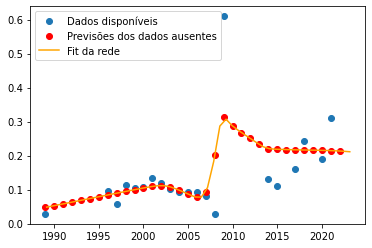

In [13]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*prop_std + prop_mean
prev_ausentes = model.predict(anos_para_prever_norm)*prop_std + prop_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0
    if prev_ausentes[i]>1:
        prev_ausentes[i]=1

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,prop,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*prop_std + prop_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

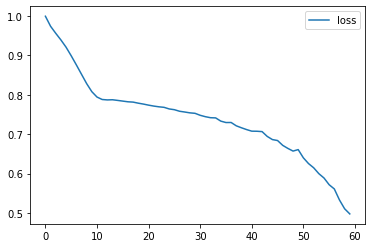

In [14]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [15]:
#Lista de anos sem buracos normalizada e sua predição      (para poder me referir por indices)

anos = np.arange(1950,np.max(anos_para_prever)+1)
anos_norm = (anos-ano_mean)/ano_std
prev_continua = model.predict(anos_norm)*prop_std + prop_mean

for i in range(len(prev_continua)):
    if prev_continua[i]<0:
        prev_continua[i]=0
    if prev_continua[i]>=1:
        prev_continua[i]=1

np.save('prev_continua_Cam_branco_art 1989-2022',prev_continua)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
